In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/zombies_data - Sheet1.csv')
X = df[['SprintSpeed', 'AmmoClips']].values
y = df['Result'].values.reshape(-1, 1)
#NORMALIZATION (Z-SCORE)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / std
# Add bias term
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

#SIGMOID FUNCTION
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# COST FUNCTION
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

# BATCH GRADIENT DESCENT
def bgd(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= lr * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# STOCHASTIC GRADIENT DESCENT
def sgd(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i].reshape(1, -1)

            h = sigmoid(xi @ theta)
            gradient = xi.T @ (h - yi)
            theta -= lr * gradient

        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history




In [16]:
lr = 0.01
iterations = 3000

theta_bgd = np.zeros((X_norm.shape[1], 1))
theta_sgd = np.zeros((X_norm.shape[1], 1))

theta_bgd, cost_bgd = bgd(X_norm, y, theta_bgd, lr, iterations)
theta_sgd, cost_sgd = sgd(X_norm, y, theta_sgd, lr, iterations)

print("BGD Theta:", theta_bgd.flatten())#thetha0-intercept,thetha1-sprint speed,thetha2-ammo clips
print("SGD Theta:", theta_sgd.flatten())


BGD Theta: [0.64020134 2.7549079  2.11698257]
SGD Theta: [1.78907429 8.47182935 6.07191192]


Test NEW Runner(25 km/h,1 Clip)

In [17]:
test = np.array([[25, 1]])
test_norm = (test - mean) / std
test_norm_bias = np.hstack([np.ones((1,1)), test_norm])

prob_bgd = sigmoid(test_norm_bias @ theta_bgd)
prob_sgd = sigmoid(test_norm_bias @ theta_sgd)

print("Survival Probability (BGD):", prob_bgd)
print("Survival Probability (SGD):", prob_sgd)


Survival Probability (BGD): [[0.9703948]]
Survival Probability (SGD): [[0.99998009]]


In [18]:
def final_class(theta, test):
    val = test @ theta
    return 1 if val >= 0 else 0

final_bgd = final_class(theta_bgd, test_norm_bias)
final_sgd = final_class(theta_sgd, test_norm_bias)



In [19]:
print("SURVIVAL PROBABILITIES ")
print("BGD Survival Probability:", float(prob_bgd))
print("SGD Survival Probability:", float(prob_sgd))

print("\n FINAL PREDICTION (Decision Boundary)")
print("BGD Final (0 = Infected, 1 = Survive):", final_bgd)
print("SGD Final (0 = Infected, 1 = Survive):", final_sgd)

SURVIVAL PROBABILITIES 
BGD Survival Probability: 0.9703947965052053
SGD Survival Probability: 0.9999800888201639

 FINAL PREDICTION (Decision Boundary)
BGD Final (0 = Infected, 1 = Survive): 1
SGD Final (0 = Infected, 1 = Survive): 1


/tmp/ipython-input-1396371069.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("BGD Survival Probability:", float(prob_bgd))
/tmp/ipython-input-1396371069.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("SGD Survival Probability:", float(prob_sgd))


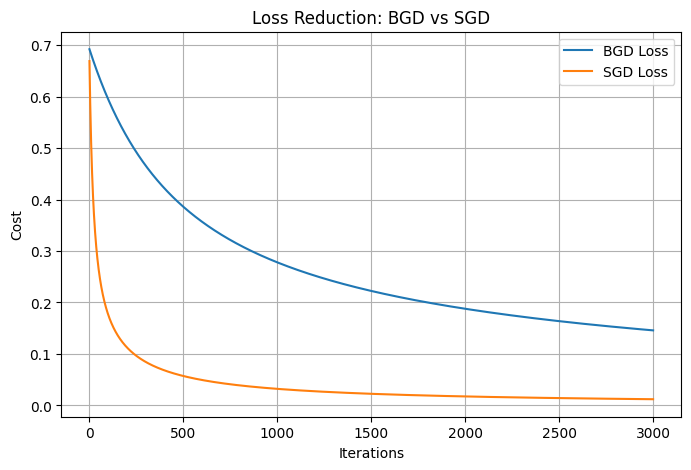

In [20]:
plt.figure(figsize=(8,5))
plt.plot(cost_bgd, label="BGD Loss")
plt.plot(cost_sgd, label="SGD Loss")
plt.title("Loss Reduction: BGD vs SGD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

PLOT DECISION Boundary

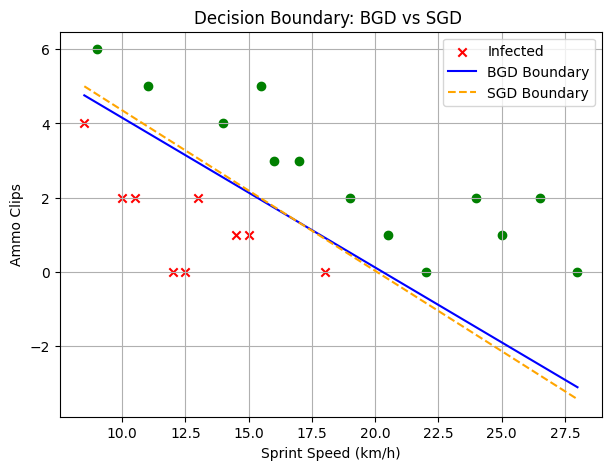

In [22]:
plt.figure(figsize=(7,5))

# plot data points
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(X[i,0], X[i,1], color='green', marker='o', label="Survive" if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color='red', marker='x', label="Infected" if i==0 else "")

x_vals = np.linspace(min(X[:,0]), max(X[:,0]), 200)
x_norm_vals = (x_vals - mean[0]) / std[0]

# BGD Line
bd_bgd = -(theta_bgd[0] + theta_bgd[1]*x_norm_vals) / theta_bgd[2]
bd_bgd = bd_bgd * std[1] + mean[1]
plt.plot(x_vals, bd_bgd, color='blue', label="BGD Boundary")

# SGD Line
bd_sgd = -(theta_sgd[0] + theta_sgd[1]*x_norm_vals) / theta_sgd[2]
bd_sgd = bd_sgd * std[1] + mean[1]
plt.plot(x_vals, bd_sgd, color='orange', linestyle='--', label="SGD Boundary")

plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary: BGD vs SGD ")
plt.legend()
plt.grid(True)
plt.show()
